<html><h1><center style="color:blue">Human Activity Recognition with Smartphones</center></h1></html>

<br> This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs,
Sitting, Standing or Laying.

30 participants(referred as subjects in this dataset) performed activities of daily living while carrying a waist-mounted 
smartphone. The phone was configured to record two implemented sensors (accelerometer and gyroscope). For these time series 
the directors of the underlying study performed feature generation and generated the dataset by moving a fixed-width window of
2.56s over the series. Since the windows had 50% overlap the resulting points are equally spaced (1.28s).This experiment 
was video recorded to label the data manually.

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


### Getting the  train data 

In [8]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt',  sep=r'\s+', header=None)
X_train.columns = features
# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI HAR Dataset/train/subject_train.txt', header=None).squeeze("columns")

y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', names=['Activity']).squeeze("columns")
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(3)


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2568           0.277478          -0.011844          -0.103219   
6621           0.233295          -0.009245          -0.111854   
4845           0.256138           0.065004          -0.058864   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2568         -0.998739         -0.989389         -0.991318         -0.999148   
6621         -0.109564         -0.016412         -0.190388         -0.175403   
4845         -0.343985          0.026993         -0.018815         -0.373229   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2568         -0.988385         -0.991843         -0.942610  ...   
6621         -0.025953         -0.271304          0.267041  ...   
4845          0.044341         -0.021707         -0.376582  ...   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean,gravityMean)  \
2568                     0.092765                             0.135492   
6621                     0.741745                            -0.723483   
4845                     0.282825                            -0.151316   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
2568                          0.515789                             -0.231932   
6621                         -0.947041                              0.329763   
4845                         -0.896342                             -0.724637   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
2568             -0.798953              0.229520             -0.028995   
6621             -0.533599              0.333542              0.238055   
4845             -0.553670              0.249066              0.293627   

      subject  Activity      ActivityName  
2568       15         5          STANDING  
6621       28         2  WALKING_UPSTAIRS  
4845       23         2  WALKING_UPSTAIRS  

[3 rows x 564 columns]

In [4]:
train.shape


(7352, 564)

### Getting the  test data 

In [9]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt',  sep=r'\s+', header=None)
X_test.columns = features
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI HAR Dataset/test/subject_test.txt', header=None).squeeze("columns")

y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze("columns")
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(3)


tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
1332           0.219793          -0.015684          -0.073695   
794            0.256625          -0.035374          -0.135054   
542            0.272490          -0.018007          -0.106399   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
1332          0.025563          0.092815         -0.387229         -0.083531   
794          -0.927757         -0.904626         -0.887345         -0.940162   
542          -0.995247         -0.992295         -0.993253         -0.995586   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
1332         -0.028050         -0.426031          0.272412  ...   
794          -0.906925         -0.889392         -0.895850  ...   
542          -0.991787         -0.993019         -0.941764  ...   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean,gravityMean)  \
1332                     0.567566                             0.872821   
794                      0.243924                             0.188219   
542                      0.180263                            -0.663104   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
1332                          0.900955                             -0.502942   
794                           0.087942                              0.191336   
542                          -0.621055                              0.771117   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
1332             -0.845031              0.192987              0.069803   
794              -0.148655              0.366655             -0.491679   
542               0.561298             -0.859362             -0.131895   

      subject  Activity        ActivityName  
1332       12         3  WALKING_DOWNSTAIRS  
794         9         4             SITTING  
542         4         6              LAYING  

[3 rows x 564 columns]

In [10]:
test.shape


(2947, 564)

### Save this dataframe in a csv files

In [ ]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)


## Exploratory Data Analysis

### 1. investigate participants activity durations.
- Since the dataset has been created in a scientific environment nearly equal preconditions for the participants can be assumed. Let us investigate their activity durations.

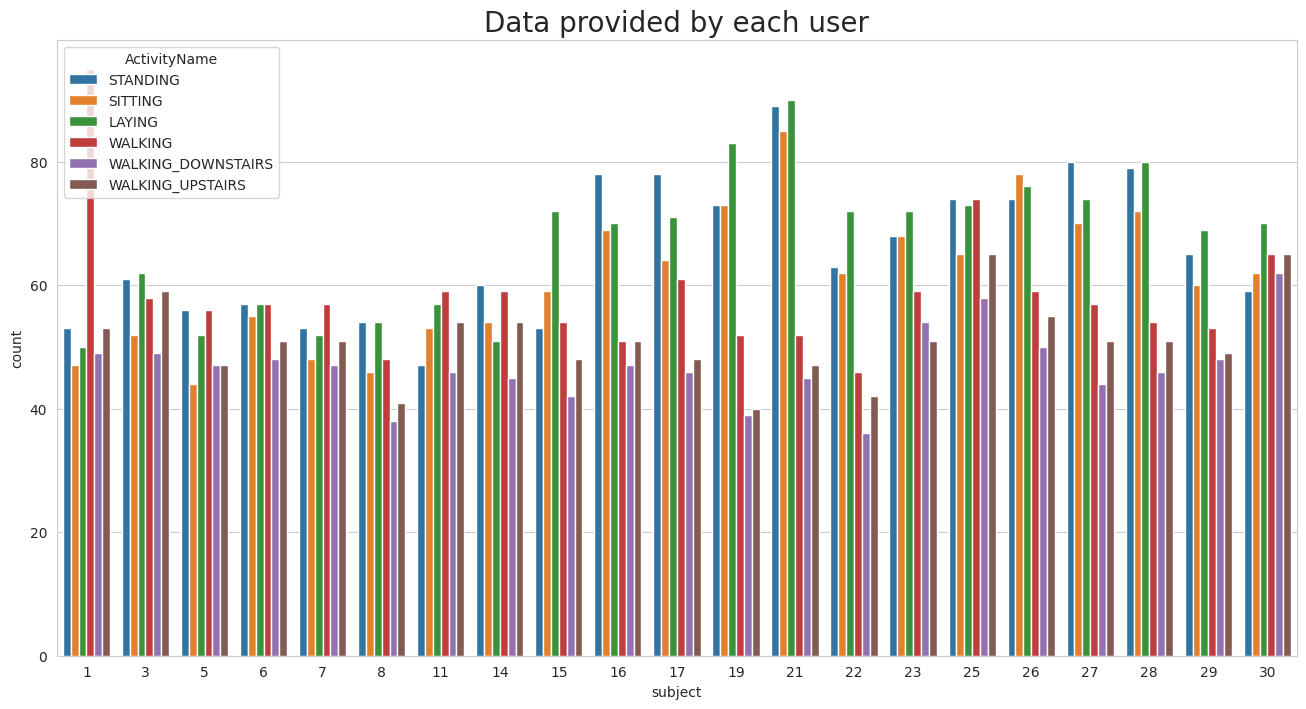

In [11]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


- Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks the participants need longer walking upstairs.

### How Are The ActivityName Distributed?

In [12]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
#iplot(fig)


- Although there are fluctuations in the label counts, the labels are quite equally distributed.

- Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs.
- Disregarding the possibility of flawed data, the participants seem to walk roughly 10% faster downwards.

### 2. Featuring Engineering from Domain Knowledge 

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.



### 3. Stationary and Moving activities are completely different

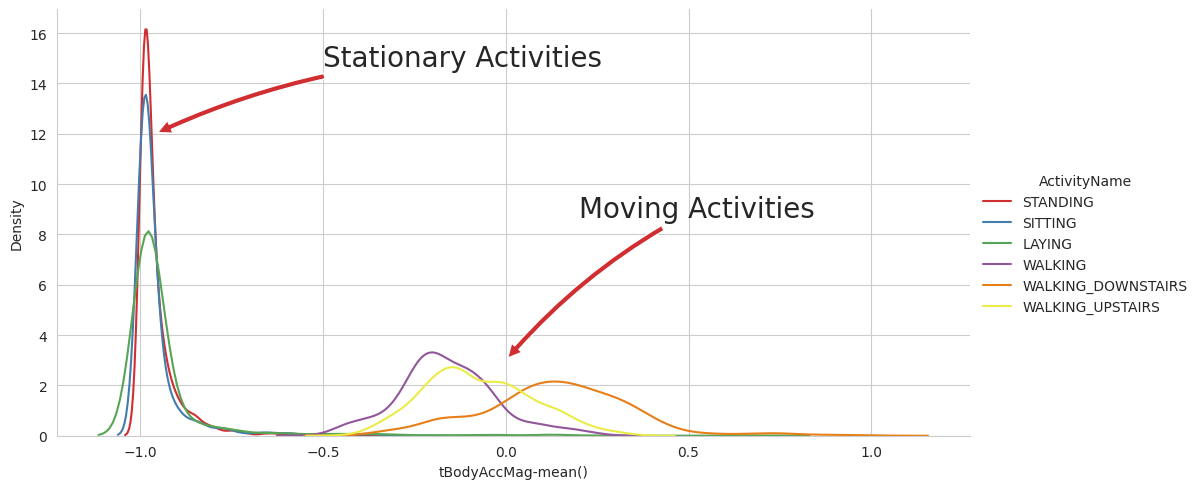

In [13]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.kdeplot, 'tBodyAccMag-mean()', fill=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()


- As aspected from most real world data, when participants are moving the data is normally distributed with some long tail.

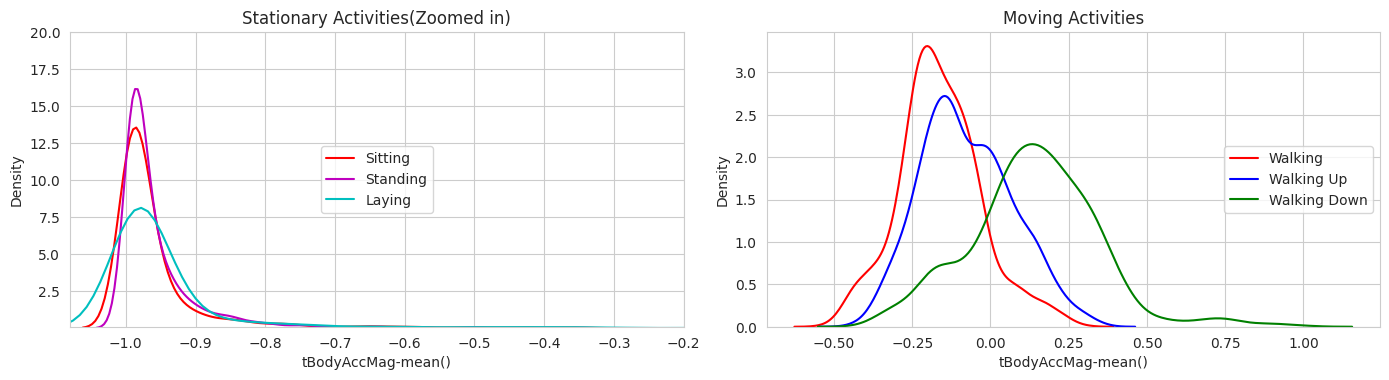

In [14]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.kdeplot(df4['tBodyAccMag-mean()'], color='r', fill=False, label='Sitting')
sns.kdeplot(df5['tBodyAccMag-mean()'], color='m', fill=False, label='Standing')
sns.kdeplot(df6['tBodyAccMag-mean()'], color='c', fill=False, label='Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.kdeplot(df1['tBodyAccMag-mean()'], color='red', fill=False, label='Walking')
sns.kdeplot(df2['tBodyAccMag-mean()'], color='blue', fill=False, label='Walking Up')
sns.kdeplot(df3['tBodyAccMag-mean()'], color='green', fill=False, label='Walking Down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()


- We can see clearly here, the distribuation of Stationary Activities and Moving Activities.

### 4. Magnitude of an acceleration can saperate it well

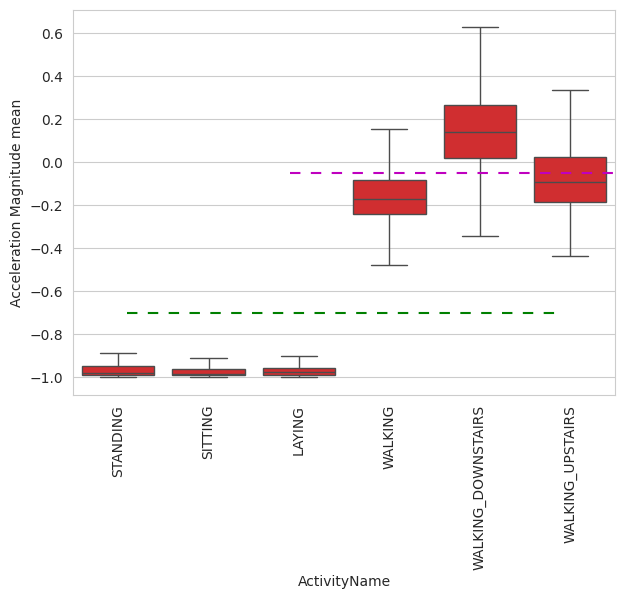

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()


- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs or WalkingUpstairs.
- We can classify 75% the Acitivity labels with some errors.

### 5. Position of GravityAccelerationComponants also matters 

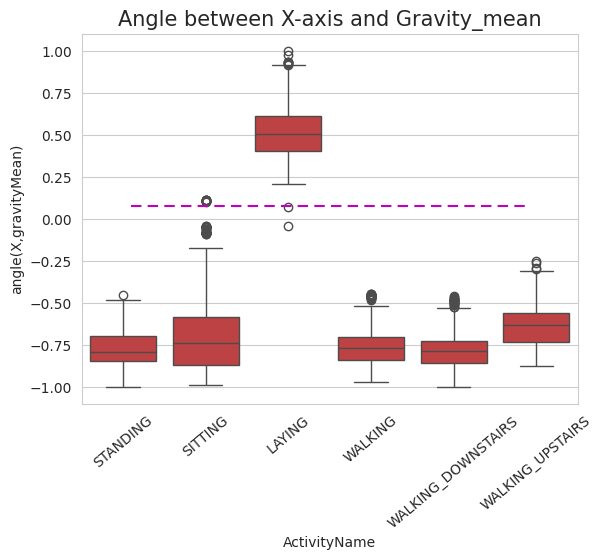

In [16]:
sns.boxplot(x='ActivityName', y='angle(X,gravityMean)', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()


- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

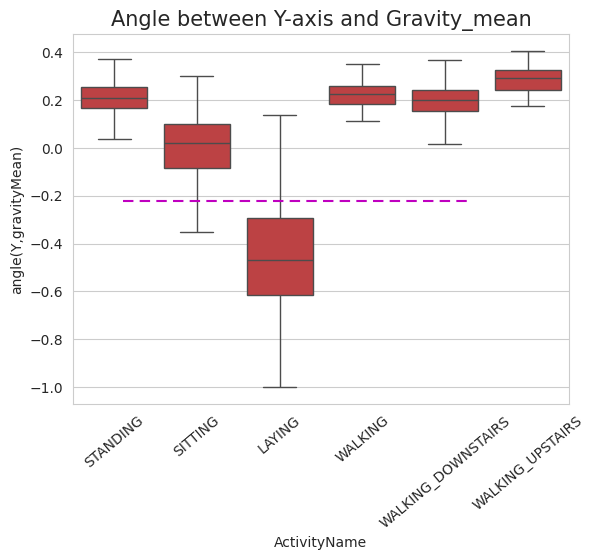

In [17]:
sns.boxplot(x='ActivityName', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()


## Apply t-sne on the data 
#### Are The Activities Separable?
- The dataset is geared towards classifying the activity of the participant. Let us investigate the separability of the classes.

In [24]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.028s...
[t-SNE] Computed neighbors for 7352 samples in 1.772s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 119.3267593, gradient norm = 0.0441013 (50 iterations in 5.622s)
[t-SNE] Iteration 100: error = 105.1437302, gradient norm = 0.0250991 (50 iterations in 

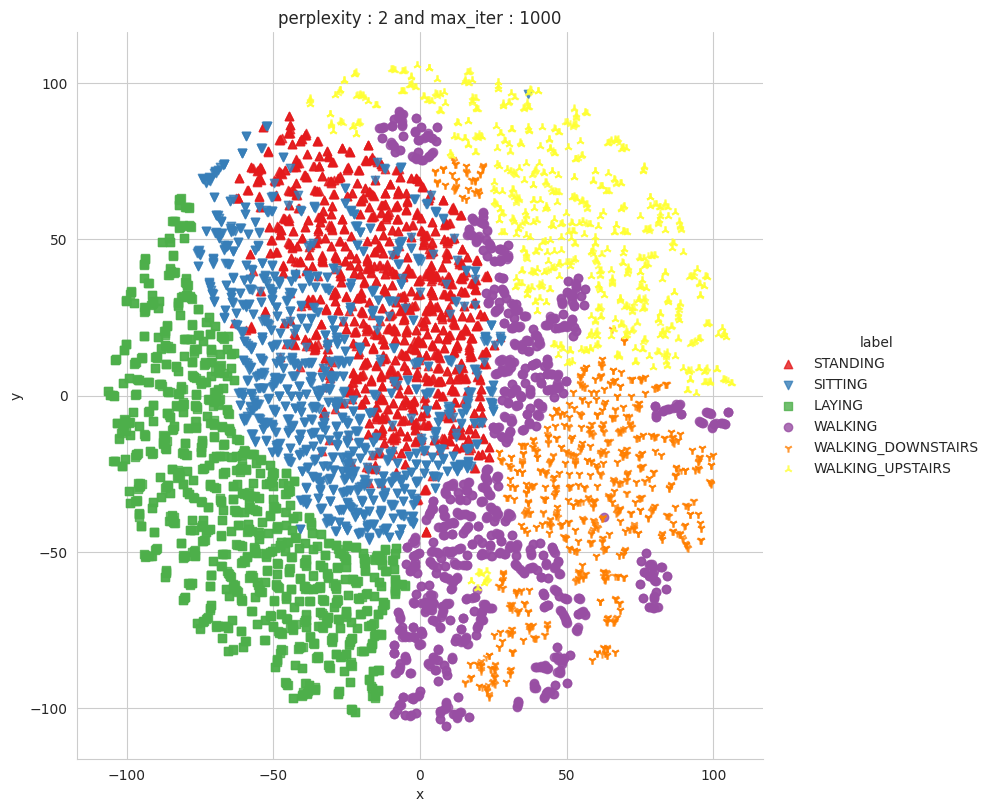

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 1.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.046s
[t-SNE] Iteration 50: error = 107.1449966, gradient norm = 0.0400124 (50 iterations in 6.513s)
[t-SNE] Iteration 100: error = 95.7037430, gradient norm = 0.0150867 (50 iteration

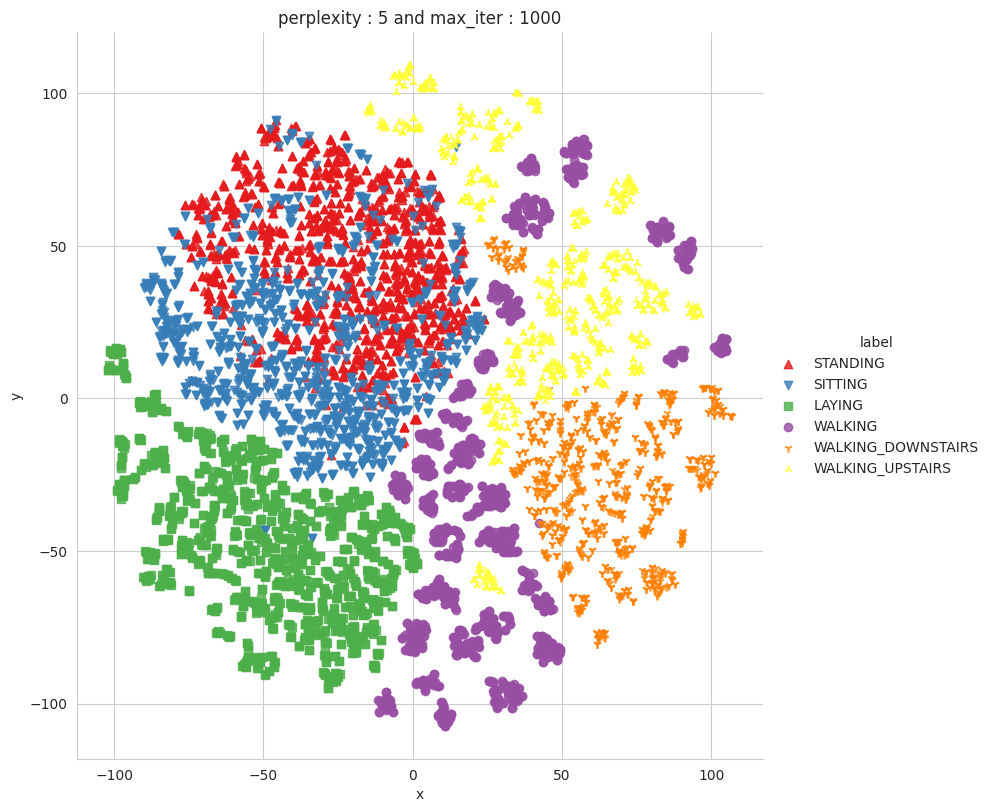

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 1.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.105s
[t-SNE] Iteration 50: error = 97.8969955, gradient norm = 0.0348410 (50 iterations in 6.922s)
[t-SNE] Iteration 100: error = 88.9272156, gradient norm = 0.0102570 (50 iteration

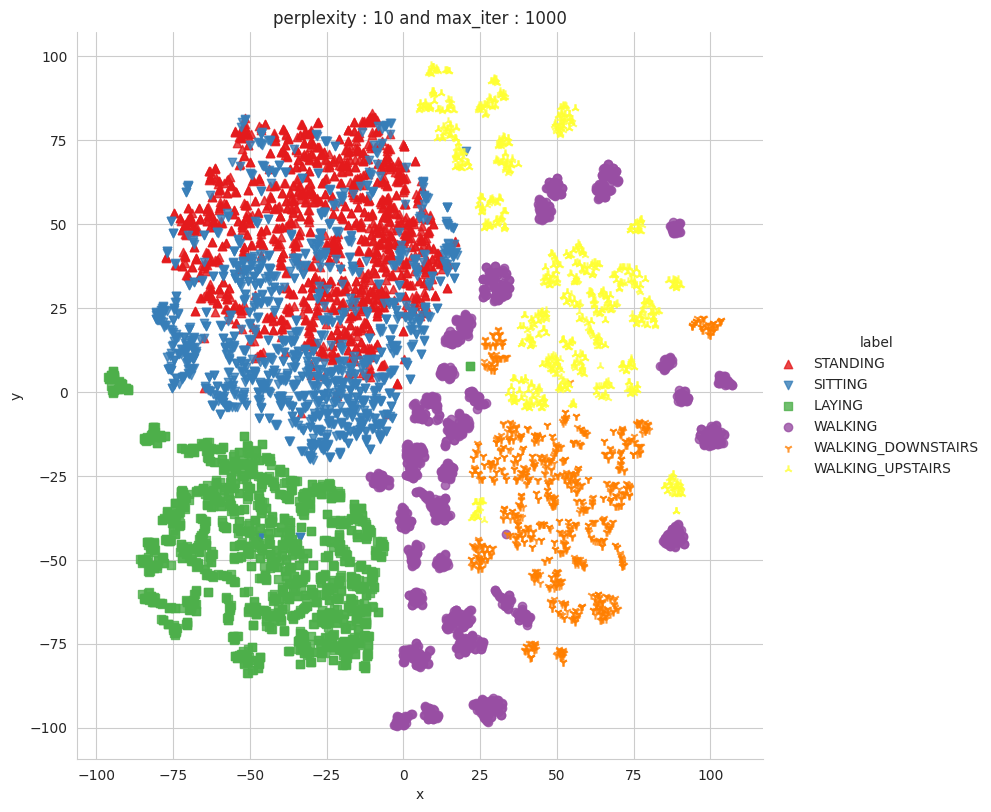

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.041s...
[t-SNE] Computed neighbors for 7352 samples in 1.874s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.248s
[t-SNE] Iteration 50: error = 89.2843552, gradient norm = 0.0288681 (50 iterations in 11.403s)
[t-SNE] Iteration 100: error = 82.9613266, gradient norm = 0.0076140 (50 iteratio

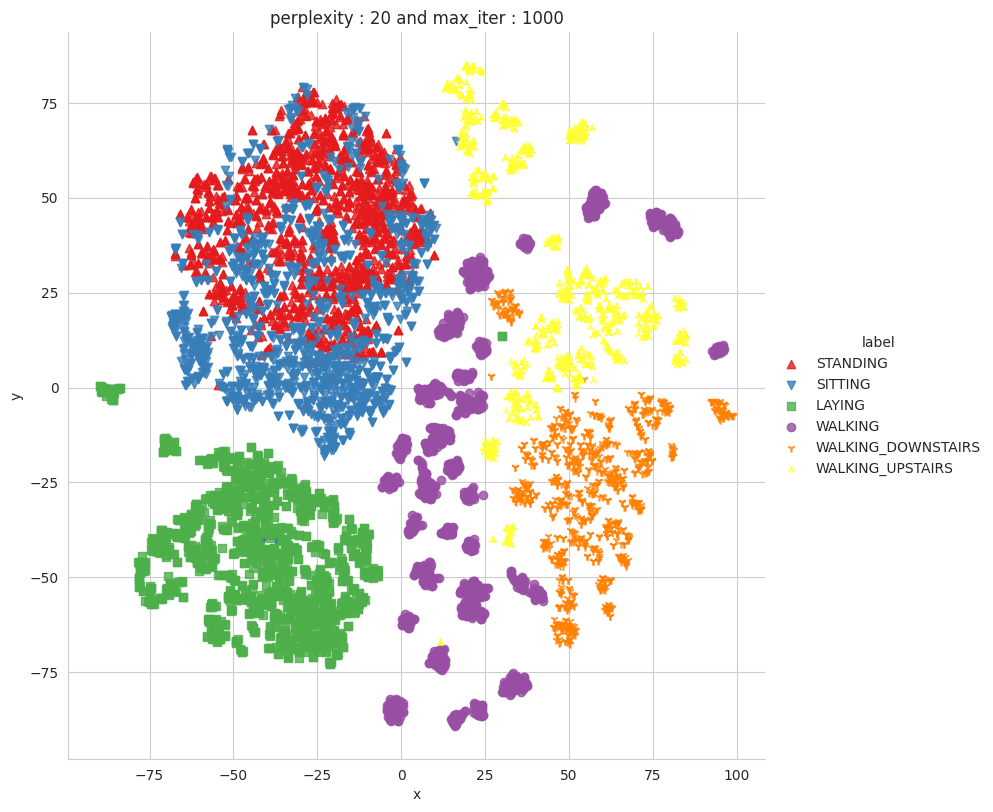

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.083s...
[t-SNE] Computed neighbors for 7352 samples in 2.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.659s
[t-SNE] Iteration 50: error = 78.8252563, gradient norm = 0.0279949 (50 iterations in 17.751s)
[t-SNE] Iteration 100: error = 75.2258835, gradient norm = 0.0054368 (50 iterati

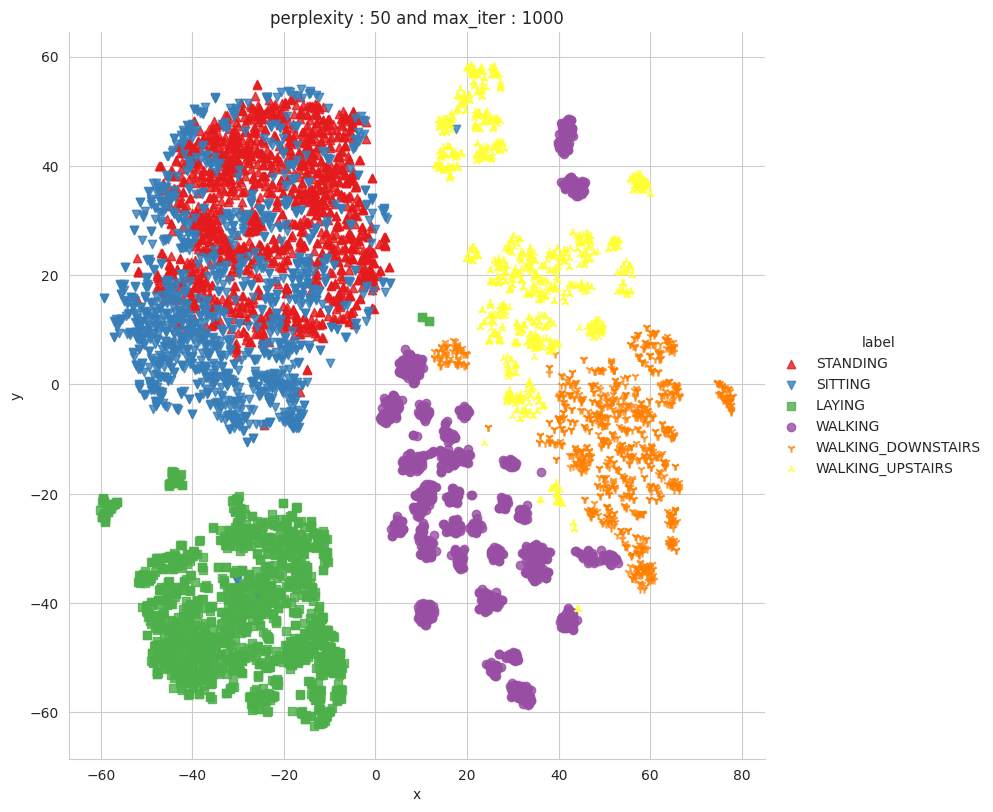

Done


In [26]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])


- We can clearly see the TSNE cluster, All the Activity are clean seperate except "Standing" and "Sitting". 

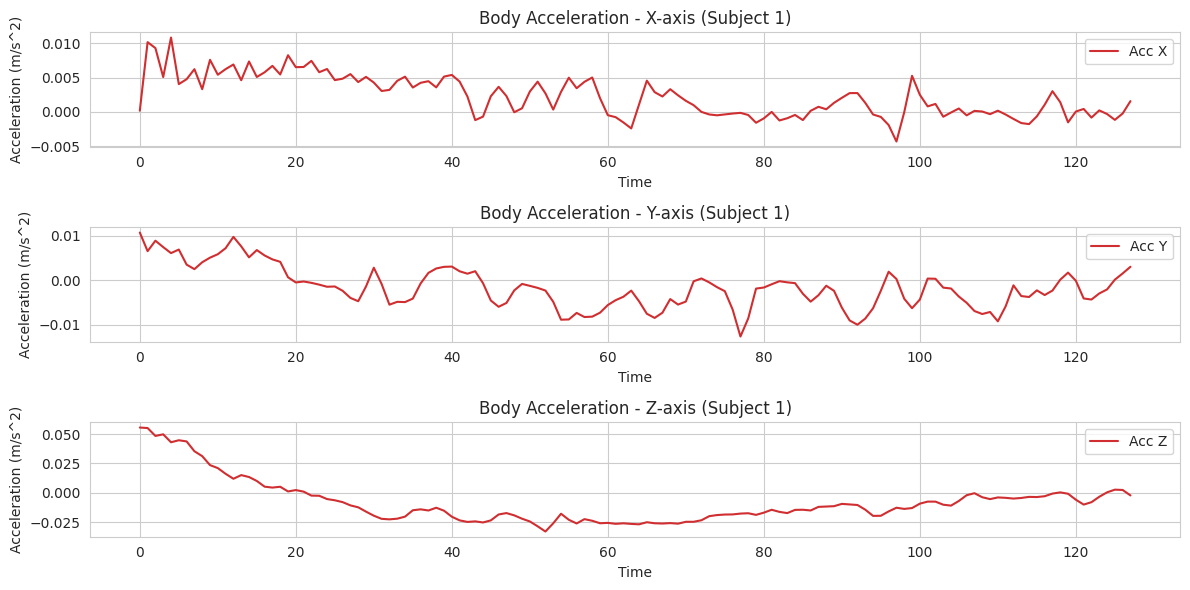

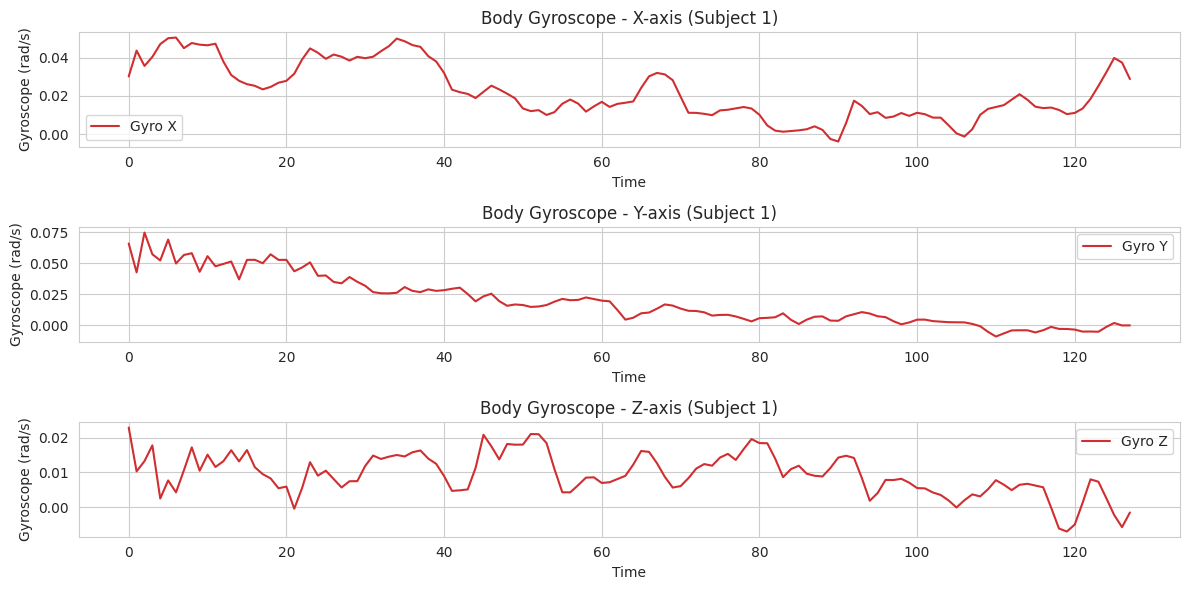

In [18]:

# 2. Plot Raw Signals from Accelerometer and Gyroscope
# Let's take the first subject and plot the raw signals of the first few samples
# Body Acceleration (x, y, z) for the first subject in the training data
subject_id = 1
subject_train = train[train['subject'] == subject_id]

# Extract accelerometer data for body acceleration (x, y, z)
body_acc_x = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', header=None, sep=r'\s+')
body_acc_y = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', header=None, sep=r'\s+')
body_acc_z = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', header=None, sep=r'\s+')

# Plot Body Acceleration Data (X, Y, Z axes) for subject 1
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(body_acc_x.iloc[subject_id-1, :], label='Acc X')
plt.title(f"Body Acceleration - X-axis (Subject {subject_id})")
plt.xlabel("Time")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(body_acc_y.iloc[subject_id-1, :], label='Acc Y')
plt.title(f"Body Acceleration - Y-axis (Subject {subject_id})")
plt.xlabel("Time")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(body_acc_z.iloc[subject_id-1, :], label='Acc Z')
plt.title(f"Body Acceleration - Z-axis (Subject {subject_id})")
plt.xlabel("Time")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()

plt.tight_layout()
plt.show()

# Gyroscope data (x, y, z)
body_gyro_x = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', header=None, sep=r'\s+')
body_gyro_y = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', header=None, sep=r'\s+')
body_gyro_z = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', header=None, sep=r'\s+')

# Plot Gyroscope Data (X, Y, Z axes) for subject 1
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(body_gyro_x.iloc[subject_id-1, :], label='Gyro X')
plt.title(f"Body Gyroscope - X-axis (Subject {subject_id})")
plt.xlabel("Time")
plt.ylabel("Gyroscope (rad/s)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(body_gyro_y.iloc[subject_id-1, :], label='Gyro Y')
plt.title(f"Body Gyroscope - Y-axis (Subject {subject_id})")
plt.xlabel("Time")
plt.ylabel("Gyroscope (rad/s)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(body_gyro_z.iloc[subject_id-1, :], label='Gyro Z')
plt.title(f"Body Gyroscope - Z-axis (Subject {subject_id})")
plt.xlabel("Time")
plt.ylabel("Gyroscope (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()


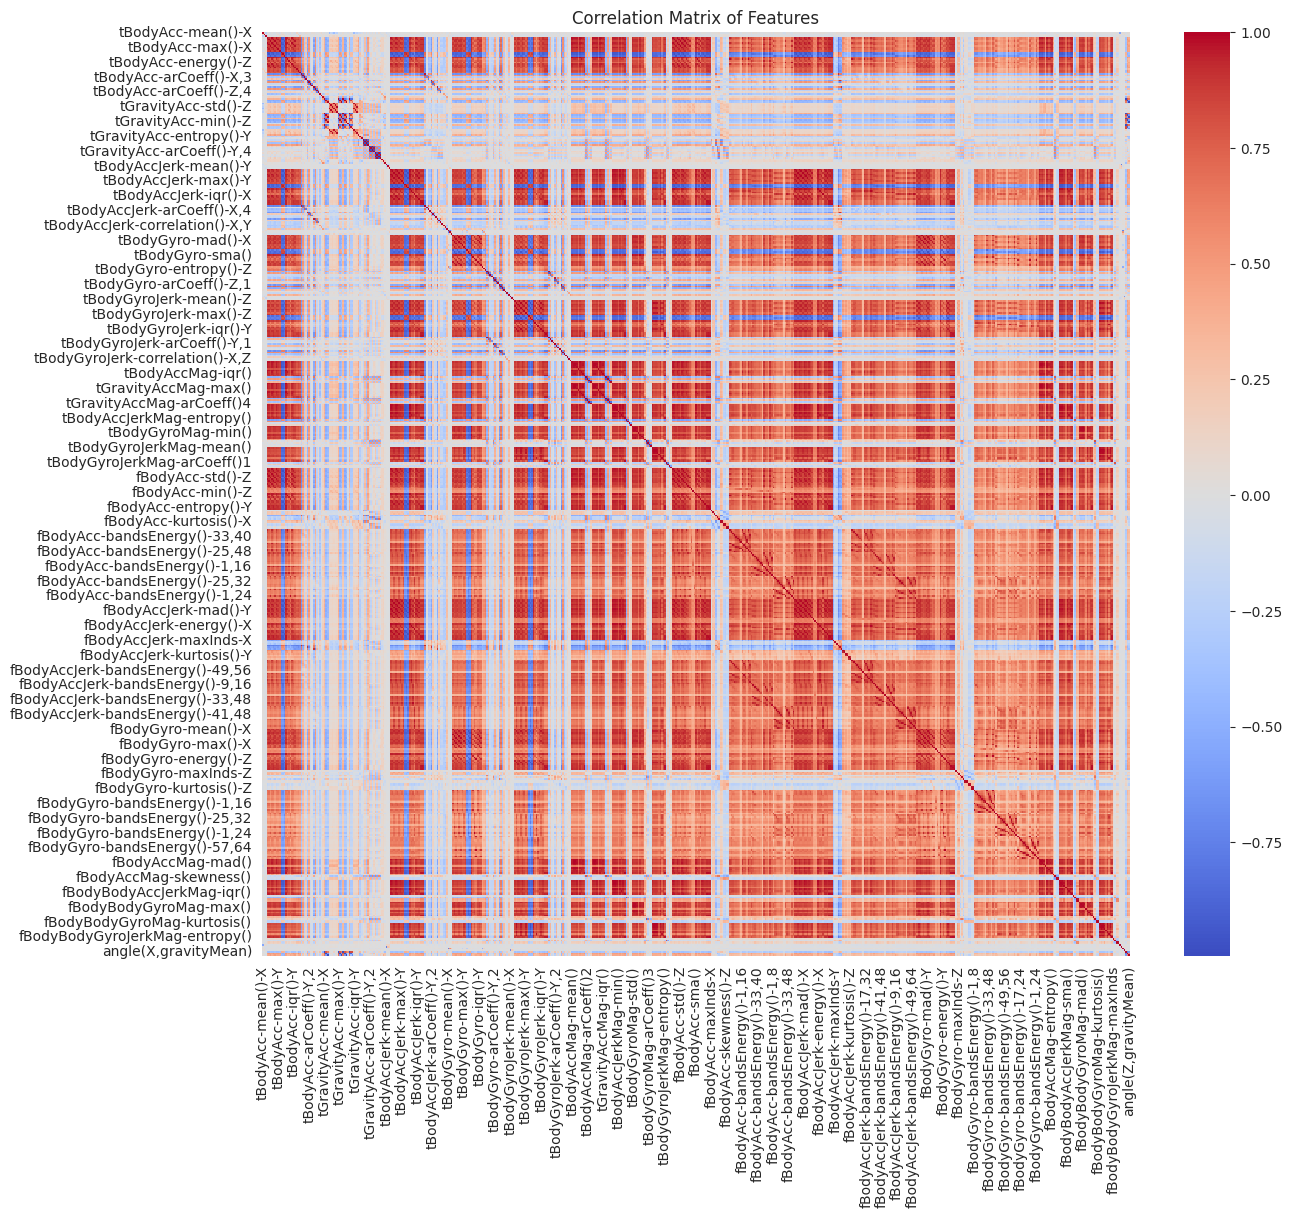

In [19]:

# 3. Analyze Correlations between Features
# Compute and plot the correlation matrix for the features in the training data
plt.figure(figsize=(14, 12))
corr_matrix = train.drop(['subject', 'Activity','ActivityName'], axis=1).corr()  # Dropping subject and activity columns
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()


<Figure size 1200x800 with 0 Axes>

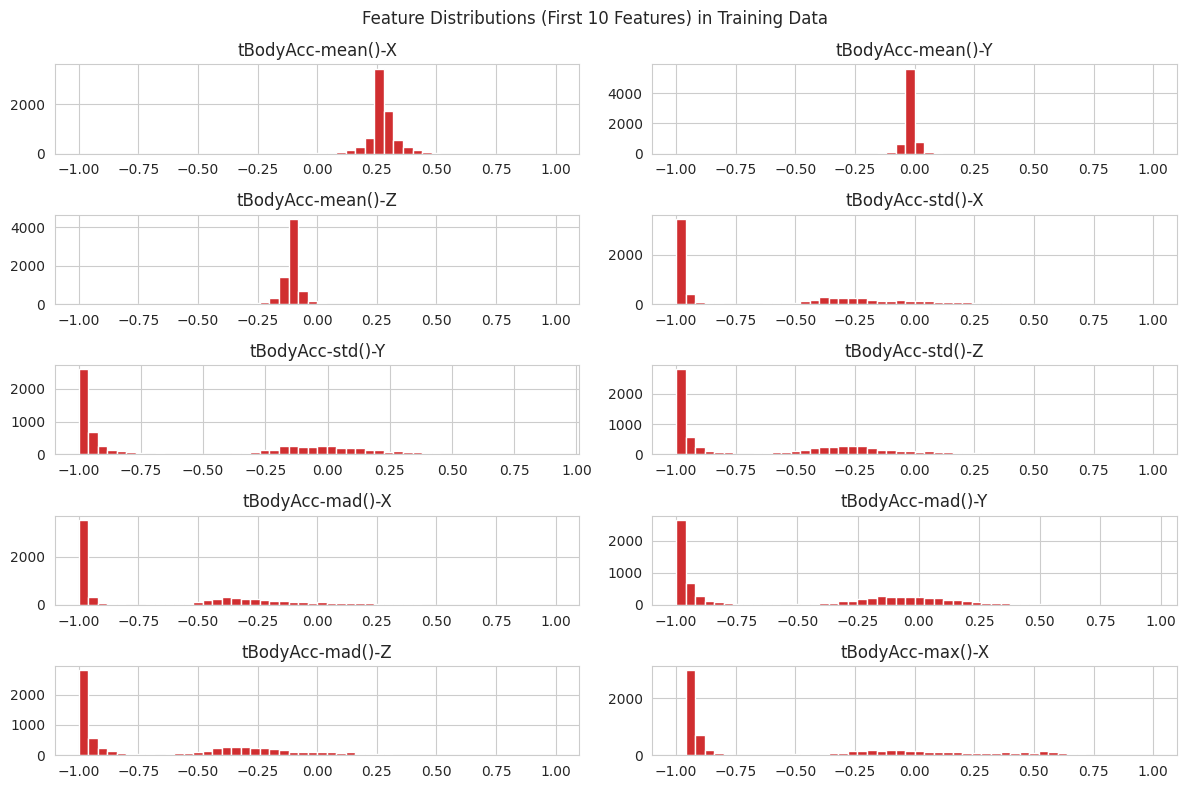

In [20]:

# 4. Feature Distributions
# Plot histograms for the first 10 features to understand their distribution
plt.figure(figsize=(12, 8))
train.drop(['subject', 'Activity','ActivityName'], axis=1).iloc[:, :10].hist(bins=50, figsize=(12, 8), layout=(5, 2))
plt.suptitle("Feature Distributions (First 10 Features) in Training Data")
plt.tight_layout()
plt.show()
